In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import sys
np.set_printoptions(threshold=sys.maxsize)


# data

In [2]:
df=pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-1/nifty_sensex_close_data/data/M&M.NS_2011_to_2023.csv')

In [3]:
#n=615 #number of data points
#w=124 #window size
def make_dataset(df,w,n):
    #for opening price
    df_open=df['M&M.NS_open']
    df_open = df_open.astype(float)
    tv_open_i=np.zeros((n-w,w))

    for i in range (n-w):
        for j in range(w):
            tv_open_i[i][j]=df_open[i+j]

    tv_open_o=np.array([df_open[i+w] for i in range(n-w)])
    tv_open_o=tv_open_o.reshape(n-w,1)

    tv_open=np.column_stack((tv_open_i,tv_open_o))

    #for high price
    df_high=df['M&M.NS_high']
    df_high = df_high.astype(float)
    tv_high_i=np.zeros((n-w,w))

    for i in range (n-w):
        for j in range(w):
            tv_high_i[i][j]=df_high[i+j]

    tv_high_o=np.array([df_high[i+w] for i in range(n-w)])
    tv_high_o=tv_high_o.reshape(n-w,1)

    tv_high=np.column_stack((tv_high_i,tv_high_o))

    #for low price
    df_low=df['M&M.NS_low']
    df_low = df_low.astype(float)
    tv_low_i=np.zeros((n-w,w))

    for i in range (n-w):
        for j in range(w):
            tv_low_i[i][j]=df_low[i+j]

    tv_low_o=np.array([df_low[i+w] for i in range(n-w)])
    tv_low_o=tv_low_o.reshape(n-w,1)

    tv_low=np.column_stack((tv_low_i,tv_low_o))

    #for close price
    df_close=df['M&M.NS_close']
    df_close = df_close.astype(float)
    tv_close_i=np.zeros((n-w,w))

    for i in range (n-w):
        for j in range(w):
            tv_close_i[i][j]=df_close[i+j]

    tv_close_o=np.array([df_close[i+w] for i in range(n-w)])
    tv_close_o=tv_close_o.reshape(n-w,1)

    tv_close=np.column_stack((tv_close_i,tv_close_o))

    return tv_open,tv_high,tv_low,tv_close


In [4]:
#splitting the dataset into training and valdation

def split_dataset(ran_tv_open,ran_tv_high,ran_tv_low,ran_tv_close):
    X_open=ran_tv_open[:,:-1]
    y_open=ran_tv_open[:,-1]
    X_train_open, X_val_open, y_train_open, y_val_open = train_test_split(X_open, y_open, test_size=0.2, random_state=0)

    X_high=ran_tv_high[:,:-1]
    y_high=ran_tv_high[:,-1]
    X_train_high, X_val_high, y_train_high, y_val_high = train_test_split(X_high, y_high, test_size=0.2, random_state=0)

    X_low=ran_tv_low[:,:-1]
    y_low=ran_tv_low[:,-1]
    X_train_low, X_val_low, y_train_low, y_val_low = train_test_split(X_low, y_low, test_size=0.2, random_state=0)

    X_close=ran_tv_close[:,:-1]
    y_close=ran_tv_close[:,-1]
    X_train_close, X_val_close, y_train_close, y_val_close = train_test_split(X_close, y_close, test_size=0.2, random_state=0)

    return X_train_open, X_val_open, y_train_open, y_val_open,X_train_high, X_val_high, y_train_high, y_val_high,X_train_low, X_val_low, y_train_low, y_val_low,X_train_close, X_val_close, y_train_close, y_val_close

In [18]:
#test data
def test_data(df,w,n,h):
    #closing price
    testdata_close=np.zeros([w])
    for i in range(w):
        testdata_close[i]=df['M&M.NS_close'][n+i+h]
    testdata_close=testdata_close.reshape(1,w)

    #opening price
    testdata_open=np.zeros([w])
    for i in range(w):
        testdata_open[i]=df['M&M.NS_open'][n+i+h]
    testdata_open=testdata_open.reshape(1,w)

    #high price
    testdata_high=np.zeros([w])
    for i in range(w):
        testdata_high[i]=df['M&M.NS_high'][n+i+h]
    testdata_high=testdata_high.reshape(1,w)

    #low price
    testdata_low=np.zeros([w])
    for i in range(w):
        testdata_low[i]=df['M&M.NS_low'][n+i+h]
    testdata_low=testdata_low.reshape(1,w)

    return testdata_open,testdata_high,testdata_low,testdata_close

# model

In [16]:
def random_forest(X_train_open, X_val_open, y_train_open,X_train_high, X_val_high, y_train_high,X_train_low, X_val_low, y_train_low,X_train_close, X_val_close, y_train_close):
    
    param_grid = {'n_estimators': [100, 200, 300, 1000], 
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
    
    random_forest = RandomForestRegressor()

    #for opening price
    rf_grid_o = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, verbose=0, n_jobs=-1)
    rf_grid_o.fit(X_train_open, y_train_open)
    y_predv_open = rf_grid_o.predict(X_val_open)

    #for high price
    rf_grid_h = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, verbose=0, n_jobs=-1)
    rf_grid_h.fit(X_train_high, y_train_high)
    y_predv_high = rf_grid_h.predict(X_val_high)

    #for low price
    rf_grid_l = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, verbose=0, n_jobs=-1)
    rf_grid_l.fit(X_train_low, y_train_low)
    y_predv_low = rf_grid_l.predict(X_val_low)

    #for close price
    rf_grid_c = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, verbose=0, n_jobs=-1)
    rf_grid_c.fit(X_train_close, y_train_close)
    y_predv_close = rf_grid_c.predict(X_val_close)

    return y_predv_open,y_predv_high,y_predv_low,y_predv_close,rf_grid_o,rf_grid_h,rf_grid_l,rf_grid_c

In [7]:
#making predictions
def predictions(testdata_open,testdata_high,testdata_low,testdata_close,rf_grid_o,rf_grid_h,rf_grid_l,rf_grid_c):
    y_pred_open = rf_grid_o.predict(testdata_open)
    y_pred_high = rf_grid_h.predict(testdata_high)
    y_pred_low = rf_grid_l.predict(testdata_low)
    y_pred_close = rf_grid_c.predict(testdata_close)

    return y_pred_open,y_pred_high,y_pred_low,y_pred_close

In [14]:
#mae and accuracy for validation
def mae_accuracy(y_predv_open,y_predv_high,y_predv_low,y_predv_close,y_val_open,y_val_high,y_val_low,y_val_close):
    mae_open = np.mean(abs(y_predv_open - y_val_open))
    mae_high = np.mean(abs(y_predv_high - y_val_high))
    mae_low = np.mean(abs(y_predv_low - y_val_low))
    mae_close = np.mean(abs(y_predv_close - y_val_close))

    return mae_open,mae_high,mae_low,mae_close

#mae and accuracy for test data
def mae_accuracy_test(y_pred_open,y_pred_high,y_pred_low,y_pred_close,df,n,w,i):
    mae_open = np.mean(abs(y_pred_open - df['M&M.NS_open'][n+w+i]))
    mae_high = np.mean(abs(y_pred_high - df['M&M.NS_high'][n+w+i]))
    mae_low = np.mean(abs(y_pred_low - df['M&M.NS_low'][n+w+i]))
    mae_close = np.mean(abs(y_pred_close - df['M&M.NS_close'][n+w+i]))

    return mae_open,mae_high,mae_low,mae_close



In [19]:
#making prediction for next day
n=615
w=124

ran_tv_open,ran_tv_high,ran_tv_low,ran_tv_close=make_dataset(df,124,615)
X_train_open, X_val_open, y_train_open, y_val_open,X_train_high, X_val_high, y_train_high, y_val_high,X_train_low, X_val_low, y_train_low, y_val_low,X_train_close, X_val_close, y_train_close, y_val_close=split_dataset(ran_tv_open,ran_tv_high,ran_tv_low,ran_tv_close)
testdata_open,testdata_high,testdata_low,testdata_close=test_data(df,w,n,69)
y_predv_open,y_predv_high,y_predv_low,y_predv_close,rf_grid_o,rf_grid_h,rf_grid_l,rf_grid_c=random_forest(X_train_open, X_val_open, y_train_open,X_train_high, X_val_high, y_train_high,X_train_low, X_val_low, y_train_low,X_train_close, X_val_close, y_train_close)
y_pred_open,y_pred_high,y_pred_low,y_pred_close=predictions(testdata_open,testdata_high,testdata_low,testdata_close,rf_grid_o,rf_grid_h,rf_grid_l,rf_grid_c)
mae_open,mae_high,mae_low,mae_close=mae_accuracy(y_predv_open,y_predv_high,y_predv_low,y_predv_close,y_val_open,y_val_high,y_val_low,y_val_close)
mae_open_test,mae_high_test,mae_low_test,mae_close_test=mae_accuracy_test(y_pred_open,y_pred_high,y_pred_low,y_pred_close,df,n,w,69)

print("MAE for opening price for validation data is: ",mae_open)
print("MAE for high price for validation data is: ",mae_high)
print("MAE for low price for validation data is: ",mae_low)
print("MAE for close price for validation data is: ",mae_close)

print("MAE for opening price for test data is: ",mae_open_test)
print("MAE for high price for test data is: ",mae_high_test)
print("MAE for low price for test data is: ",mae_low_test)
print("MAE for close price for test data is: ",mae_close_test)

print("Predicted opening price for next day is: ",y_pred_open)
print("Predicted high price for next day is: ",y_pred_high)
print("Predicted low price for next day is: ",y_pred_low)
print("Predicted close price for next day is: ",y_pred_close)

print("Actual closing price for next day is: ",df['M&M.NS_close'][n+w+69])


MAE for opening price for validation data is:  4.750721800224607
MAE for high price for validation data is:  4.196053317816078
MAE for low price for validation data is:  4.065371102508493
MAE for close price for validation data is:  5.305364692765053
MAE for opening price for test data is:  24.82505134602428
MAE for high price for test data is:  14.030138522984942
MAE for low price for test data is:  20.964931079053542
MAE for close price for test data is:  21.746928863525397
Predicted opening price for next day is:  [439.74638302]
Predicted high price for next day is:  [453.70852666]
Predicted low price for next day is:  [438.05240473]
Predicted close price for next day is:  [439.79500229]
Actual closing price for next day is:  461.54193115234375


In [20]:
avg_pred=(y_pred_open+y_pred_high+y_pred_low+y_pred_close)/4
avg_pred

array([442.82557917])

In [21]:
#mae and accuracy for average prediction
mae_avg= np.mean(abs(avg_pred - df['M&M.NS_close'][n+w+69]))
print("MAE for average prediction for test data is: ",mae_avg)

accuracy_tn=100*(1-mae_avg/df['M&M.NS_close'][n+w+69])
print('accuracy:',accuracy_tn)

print("Actual closing price for next day is: ",df['M&M.NS_close'][n+w+69])


MAE for average prediction for test data is:  18.716351978826765
accuracy: 95.9448208893833
Actual closing price for next day is:  461.54193115234375


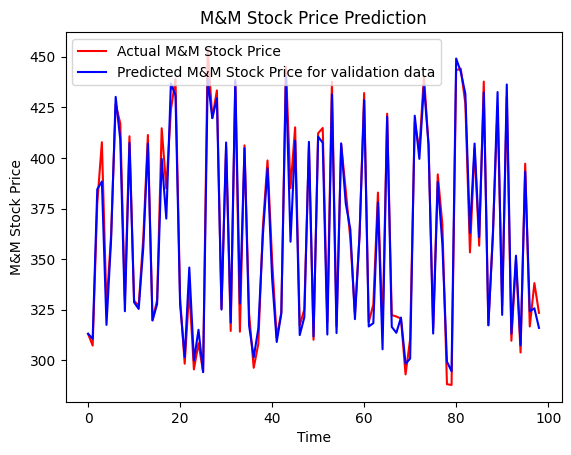

In [22]:
#plotting the graph for actual and predicted values for validation data
plt.plot(y_val_close, color = 'red', label = 'Actual M&M Stock Price')
plt.plot(y_predv_close, color = 'blue', label = 'Predicted M&M Stock Price for validation data')
plt.title('M&M Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('M&M Stock Price')
plt.legend()
plt.show()

In [59]:
df['M&M.NS_close'][2959+w]

1460.0494384765625

In [60]:
testdata_open,testdata_high,testdata_low,testdata_close=test_data(df,w,2959)

y_pred1_open,y_pred2_high,y_pred3_low,y_pred4_close=predictions(testdata_open,testdata_high,testdata_low,testdata_close,rf_grid_o,rf_grid_h,rf_grid_l,rf_grid_c)


In [62]:
#error
mae_open_test,mae_high_test,mae_low_test,mae_close_test=mae_accuracy_test(y_pred1_open,y_pred2_high,y_pred3_low,y_pred4_close,df,2959,w)
print("MAE for opening price for test data is: ",mae_open_test)
print("MAE for high price for test data is: ",mae_high_test)
print("MAE for low price for test data is: ",mae_low_test)
print("MAE for close price for test data is: ",mae_close_test)

print("Predicted opening price for next day is: ",y_pred1_open)
print("Predicted high price for next day is: ",y_pred2_high)
print("Predicted low price for next day is: ",y_pred3_low)
print("Predicted close price for next day is: ",y_pred4_close)

MAE for opening price for test data is:  1002.270716586632
MAE for high price for test data is:  1006.1514874547138
MAE for low price for test data is:  999.9733378948604
MAE for close price for test data is:  1013.9600131225586
Predicted opening price for next day is:  [446.49692468]
Predicted high price for next day is:  [456.5204926]
Predicted low price for next day is:  [442.0153674]
Predicted close price for next day is:  [446.08942535]
